<a href="https://colab.research.google.com/github/NancyYiWang/WildFireSmokePrediction/blob/main/DataGOES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Already required data from NOAA. Now download data.

import ftplib
from ftplib import FTP
import os

ftp_host = "ftp-order.class.noaa.gov"
ftp_user = "ftp"
ftp_password = "user@internet"
ftp_directory = "8461314109"
local_directory = "/content/drive/My Drive/WildFire/DATA/NOAA_GOES_R"

def download_ftp_directory(ftp, ftp_directory, local_directory):
    os.makedirs(local_directory, exist_ok=True)
    ftp.cwd(ftp_directory)
    print(f"Entering directory: {ftp_directory}")

    file_list = ftp.nlst()
    for item in file_list:
      local_path = os.path.join(local_directory, item)
      try:
        if "." in item:
          print(f"Downloading file: {item} to {local_path}")
          with open(local_path, "wb") as f:
            ftp.retrbinary(f"RETR {item}", f.write)
        else:
          print(f"Found subdirectory: {item}")
          download_ftp_directory(ftp, item, local_path)
      except ftplib.error_perm as e:
        print(f"Skipping {item}: {e}")

    ftp.cwd("..")
    print(f"Returning to parent directory.")

ftp = ftplib.FTP(ftp_host)
ftp.login(ftp_user, ftp_password)
print("Connected to FTP server.")

ftp.voidcmd("TYPE I")
print("Binary transfer mode enabled")

print("Starting FTP download...")
download_ftp_directory(ftp, ftp_directory, local_directory)

ftp.quit()
print("All files and directories have been downloaded to Google Drive!")

Connected to FTP server.
Binary transfer mode enabled
Starting FTP download...
Entering directory: 8461314109
Found subdirectory: 001
Entering directory: 001
Returning to parent directory.
Returning to parent directory.
All files and directories have been downloaded to Google Drive!


In [2]:
# Check the metadata and variables as well as the variable dimensions of the data. Take the first .nc file as an example

!pip install netCDF4
!pip install matplotlib
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 41.5 MB/s eta 0:00:00


In [3]:
import os
from netCDF4 import Dataset

nc_directory = "/content/drive/My Drive/WildFire/DATA/NOAA_GOES_R/001"

nc_files = [f for f in os.listdir(nc_directory) if f.endswith('.nc')]

nc_file_path = os.path.join(nc_directory, nc_files[0])
print(f"\nReading file: {nc_file_path}")

nc_data = Dataset(nc_file_path, 'r')

print(nc_data)


Reading file: /content/drive/My Drive/WildFire/DATA/NOAA_GOES_R/001/ABI-L2-GFLSC-M6_v3r1_g18_s202406010001179_e202406010003552_c202406010005019.nc
<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6,ACDD 1.3
    Metadata_Conventions: CF-1.6, Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table v76
    institution: DOC/NOAA/NESDIS/OSPO > Office of Satellite and Product Operations, NESDIS, NOAA, U.S. Department of Commerce.
    naming_authority: gov.noaa.nesdis.ospo
    processing_level: NOAA Level 2
    production_site: NSOF
    production_environment: OE
    sensor_band_identifier: 2, 7, 14
    sensor_band_central_radiation_wavelength: 0.64um, 3.9um, 11.2um
    satellite_name: GOES-18
    instrument: GOES-R Series Advanced Baseline Imager
    project: ESPDS
    summary: Fog Depth and Flight Rule Probabilities
    history: Enterprise FLS Algorithm Version 2.3.1
    references: N/A
    resolution: 2km at nad

In [4]:
print("\nVariables in the file:")
for var in nc_data.variables:
    dimensions = nc_data.variables[var].dimensions
    print(f"{var}: {dimensions}")

    if not dimensions:
            value = nc_data.variables[var][:]
            print(f"Value: {value}")


Variables in the file:
StartRow: ()
Value: 1
StartColumn: ()
Value: 1
Latitude: ('Rows', 'Columns')
Longitude: ('Rows', 'Columns')
Fog_Lrc_Mask: ('Rows', 'Columns')
Fog_Qf: ('Rows', 'Columns', 'QfConst')
Fog_Qpi: ('Rows', 'Columns', 'QPIConst')
MVFR_Fog_Prob: ('Rows', 'Columns')
IFR_Fog_Prob: ('Rows', 'Columns')
IFR_RHonly_Fog_Prob: ('Rows', 'Columns')
LIFR_Fog_Prob: ('Rows', 'Columns')
Fog_Depth: ('Rows', 'Columns')
Sfc_Temp_Bias: ('Rows', 'Columns')
Sfc_Temp_Bias_Global: ('Rows', 'Columns')
Refl_Chn2_StdDev: ('Rows', 'Columns')
Refl_Chn2_StdDev_Lrc: ('Rows', 'Columns')
Refl_Chn2_Stddev_Composite: ('Rows', 'Columns')
BT_Chn14_StdDev: ('Rows', 'Columns')
Emiss_Chn7_Atm_Correc: ('Rows', 'Columns')
Emiss_Chn7_Composite: ('Rows', 'Columns')
Refl_Chn7_Composite: ('Rows', 'Columns')
Sfc_Elevation: ('Rows', 'Columns')
Sfc_RH: ('Rows', 'Columns')
Sfc_RH_Global: ('Rows', 'Columns')
Max_RH_500ft_Lay: ('Rows', 'Columns')
Max_RH_1000ft_Lay: ('Rows', 'Columns')
Max_RH_3000ft_Lay: ('Rows', 'Column

In [5]:
# Pick variables that are highly relevant to the wildfire smoke density as a starting point

smoke_density_relevant_variables = [
    "MVFR_Fog_Prob",
    "IFR_Fog_Prob",
    "LIFR_Fog_Prob",
    "Fog_Depth",
    "Sfc_Temp_Bias",
]

# Pick variables that are relevant to the wildfire smoke dispersion

smoke_dispersion_relevant_variables = [
    "Sfc_RH",
    "Max_RH_500ft_Lay_Above",
    "Max_RH_1000ft_Lay_Above",
    "Max_RH_3000ft_Lay_Above",
    "Sfc_Elevation",
    "Max_RH_Hgt_Sfc_Elev_Diff",
]

In [27]:
!pip install rasterio folium xarray numpy -q

import numpy as np
import xarray as xr
import rasterio
from rasterio.transform import from_origin
import folium
from folium.raster_layers import ImageOverlay

# Define directories
nc_directory = "/content/drive/My Drive/WildFire/DATA/NOAA_GOES_R/001"
geo_tiff_directory = "/content/drive/My Drive/WildFire/DATA/NOAA_GOES_R/GeoTIFF"
animation_directory = "/content/drive/My Drive/WildFire/DATA/NOAA_GOES_R/animation"
os.makedirs(geo_tiff_directory, exist_ok=True)

In [29]:
# Convert .nc files to GeoTIFF files
# Choose the first file of each hour as examples
# Extract timestamp from filename

def extract_timestamp_from_filename(filename):
    try:
        timestamp = filename.split('_s')[1][:12]  # Extract the start time as a timestamp
        return timestamp
    except IndexError:
        print(f"Error extracting timestamp from {filename}")
        return None

# Filter files to get the first file of each hour
def filter_first_file_per_hour(nc_files):
    hourly_files = {}
    for nc_file in nc_files:
        timestamp = extract_timestamp_from_filename(nc_file)
        if not timestamp:
            continue
        hour = timestamp[8:10]  # Extract the hour portion of the timestamp
        if hour not in hourly_files:
            hourly_files[hour] = nc_file
    return list(hourly_files.values())

# Convert NetCDF to GeoTIFF
def convert_nc_to_geotiff(ds, variable, output_directory, timestamp):
    try:
        data = ds[variable].values
        lon, lat = ds["Longitude"].values, ds["Latitude"].values

        lon = np.ma.filled(lon, np.nan) if np.ma.is_masked(lon) else lon
        lat = np.ma.filled(lat, np.nan) if np.ma.is_masked(lat) else lat

        if np.isnan(data).all() or data.shape != lon.shape or data.shape != lat.shape:
            print(f"Skipping variable '{variable}': Data is invalid or mismatched.")
            return None

        transform = from_origin(
            np.nanmin(lon), np.nanmax(lat),
            lon[0, 1] - lon[0, 0],
            lat[1, 0] - lat[0, 0]
        )
        output_file = os.path.join(output_directory, f"{variable}_{timestamp}.tif")
        with rasterio.open(
            output_file, "w", driver="GTiff",
            height=data.shape[0], width=data.shape[1],
            count=1, dtype=data.dtype.name,
            crs="EPSG:4326", transform=transform
        ) as dst:
            dst.write(data, 1)
        print(f"GeoTIFF saved at: {output_file}")
        return output_file
    except Exception as e:
        print(f"Error processing variable '{variable}': {e}")
        return None

# Main processing: Generate GeoTIFF files
nc_files = [f for f in os.listdir(nc_directory) if f.endswith('.nc')]
filtered_nc_files = filter_first_file_per_hour(nc_files)

geo_tiff_files = {var: [] for var in smoke_density_relevant_variables}

for nc_file in filtered_nc_files:
    nc_file_path = os.path.join(nc_directory, nc_file)
    timestamp = extract_timestamp_from_filename(nc_file)
    if not timestamp:
        continue

    try:
        ds = xr.open_dataset(nc_file_path, chunks="auto")
        for variable in smoke_density_relevant_variables:
            if variable in ds.variables:
                geo_tiff_file = convert_nc_to_geotiff(ds, variable, geo_tiff_directory, timestamp)
                if geo_tiff_file:
                    geo_tiff_files[variable].append({"path": geo_tiff_file, "timestamp": timestamp})
    except Exception as e:
        print(f"Error processing NetCDF file {nc_file}: {e}")
    finally:
        ds.close()

GeoTIFF saved at: /content/drive/My Drive/WildFire/DATA/NOAA_GOES_R/GeoTIFF/MVFR_Fog_Prob_202406010001.tif
GeoTIFF saved at: /content/drive/My Drive/WildFire/DATA/NOAA_GOES_R/GeoTIFF/IFR_Fog_Prob_202406010001.tif
GeoTIFF saved at: /content/drive/My Drive/WildFire/DATA/NOAA_GOES_R/GeoTIFF/LIFR_Fog_Prob_202406010001.tif
GeoTIFF saved at: /content/drive/My Drive/WildFire/DATA/NOAA_GOES_R/GeoTIFF/Fog_Depth_202406010001.tif
GeoTIFF saved at: /content/drive/My Drive/WildFire/DATA/NOAA_GOES_R/GeoTIFF/Sfc_Temp_Bias_202406010001.tif
GeoTIFF saved at: /content/drive/My Drive/WildFire/DATA/NOAA_GOES_R/GeoTIFF/MVFR_Fog_Prob_202406010101.tif
GeoTIFF saved at: /content/drive/My Drive/WildFire/DATA/NOAA_GOES_R/GeoTIFF/IFR_Fog_Prob_202406010101.tif
GeoTIFF saved at: /content/drive/My Drive/WildFire/DATA/NOAA_GOES_R/GeoTIFF/LIFR_Fog_Prob_202406010101.tif
GeoTIFF saved at: /content/drive/My Drive/WildFire/DATA/NOAA_GOES_R/GeoTIFF/Fog_Depth_202406010101.tif
GeoTIFF saved at: /content/drive/My Drive/WildF

Animation saved at: /content/drive/My Drive/WildFire/DATA/NOAA_GOES_R/animation/MVFR_Fog_Prob_time_series.mp4
Animation saved at: /content/drive/My Drive/WildFire/DATA/NOAA_GOES_R/animation/IFR_Fog_Prob_time_series.mp4
Animation saved at: /content/drive/My Drive/WildFire/DATA/NOAA_GOES_R/animation/LIFR_Fog_Prob_time_series.mp4
Animation saved at: /content/drive/My Drive/WildFire/DATA/NOAA_GOES_R/animation/Fog_Depth_time_series.mp4


CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1500x900', '-pix_fmt', 'rgba', '-framerate', '1', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/content/drive/My Drive/WildFire/DATA/NOAA_GOES_R/animation/Sfc_Temp_Bias_time_series.mp4']' returned non-zero exit status 255.

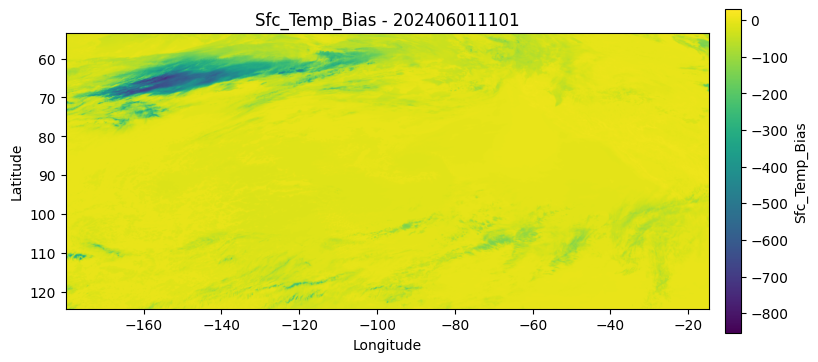

In [38]:
import rasterio
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

def create_animation(geo_tiff_files, variable, animation_directory):
    fig, ax = plt.subplots(figsize=(10, 6))

    # 计算所有帧的最小值和最大值，以确保颜色条范围一致
    min_value, max_value = float("inf"), float("-inf")
    for file_info in geo_tiff_files:
        with rasterio.open(file_info["path"]) as src:
            data = src.read(1)
            min_value = min(min_value, np.nanmin(data))
            max_value = max(max_value, np.nanmax(data))

    # Update function for the animation
    def update(frame):
        file_info = geo_tiff_files[frame]
        with rasterio.open(file_info["path"]) as src:
            data = src.read(1)
            bounds = src.bounds

        extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

        # Clear and plot data
        ax.clear()
        im = ax.imshow(data, cmap="viridis", extent=extent, origin="upper", vmin=min_value, vmax=max_value)
        ax.set_title(f"{variable} - {file_info['timestamp']}")
        ax.set_xlabel("Longitude")
        ax.set_ylabel("Latitude")

        # Create or update the colorbar
        if "colorbar" not in update.__dict__:
            update.colorbar = fig.colorbar(
                im, ax=ax, orientation="vertical", shrink=0.6, pad=0.05
            )
            update.colorbar.set_label(variable)
        else:
            update.colorbar.update_normal(im)

    ani = FuncAnimation(fig, update, frames=len(geo_tiff_files), interval=1000)

    # Save the animation
    output_file = os.path.join(animation_directory, f"{variable}_time_series.mp4")
    ani.save(output_file, fps=1, dpi=150)
    print(f"Animation saved at: {output_file}")
    plt.close(fig)

# Generate animations for each variable
for variable, files in geo_tiff_files.items():
    if files:
        create_animation(files, variable, animation_directory)